In [1]:
#import packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt; plt.rcdefaults()
from pylab import rcParams
import seaborn as sb


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
sb.set_style('whitegrid')

In [3]:
#upload dataset from user file, where python is stored
address = 'vgsales.csv'
vgsales = pd.read_csv(address)
vgsales.columns = ['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'naSales', 'euSales', 'jpSales', 
                   'otherSales', 'globalSales']
vgsales.head(20)

,rank,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
vgsales.info()
# categorical variables: name, platform, year, genre, publisher
#categorical count: 5
# numerical variables: rank, naSales, euSales, jpSales, otherSales, globalSales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         16598 non-null  int64  
 1   name         16598 non-null  object 
 2   platform     16598 non-null  object 
 3   year         16327 non-null  float64
 4   genre        16598 non-null  object 
 5   publisher    16540 non-null  object 
 6   naSales      16598 non-null  float64
 7   euSales      16598 non-null  float64
 8   jpSales      16598 non-null  float64
 9   otherSales   16598 non-null  float64
 10  globalSales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
#check the numerical attributes for 0 value
numMissing = (vgsales[['year', 'naSales', 'euSales', 'jpSales', 
                   'otherSales', 'globalSales']] == 0).sum()
print(numMissing)

year               0
naSales         4499
euSales         5730
jpSales        10455
otherSales      6477
globalSales        0
dtype: int64


In [6]:
top500since2006 = vgsales[vgsales['year'] >= 2006.0][:500]
top500since2006

,rank,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
904,906,Game Party 2,Wii,2008.0,Misc,Midway Games,1.30,0.44,0.00,0.17,1.91
905,907,Destiny: The Taken King,PS4,2015.0,Shooter,Activision,0.77,0.78,0.04,0.31,1.91
906,908,LEGO Star Wars III: The Clone Wars,Wii,2011.0,Action,LucasArts,1.08,0.66,0.00,0.17,1.91
908,910,Max Payne 3,PS3,2012.0,Shooter,Take-Two Interactive,0.59,0.92,0.06,0.32,1.90


In [7]:
rank = list(range(1, 501))
top500since2006 = top500since2006.drop(['rank'], axis = 1)
top500since2006

,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...
904,Game Party 2,Wii,2008.0,Misc,Midway Games,1.30,0.44,0.00,0.17,1.91
905,Destiny: The Taken King,PS4,2015.0,Shooter,Activision,0.77,0.78,0.04,0.31,1.91
906,LEGO Star Wars III: The Clone Wars,Wii,2011.0,Action,LucasArts,1.08,0.66,0.00,0.17,1.91
908,Max Payne 3,PS3,2012.0,Shooter,Take-Two Interactive,0.59,0.92,0.06,0.32,1.90


In [8]:
top500since2006.insert(0, "rank", rank, False)
top500since2006

,rank,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,4,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,5,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
904,496,Game Party 2,Wii,2008.0,Misc,Midway Games,1.30,0.44,0.00,0.17,1.91
905,497,Destiny: The Taken King,PS4,2015.0,Shooter,Activision,0.77,0.78,0.04,0.31,1.91
906,498,LEGO Star Wars III: The Clone Wars,Wii,2011.0,Action,LucasArts,1.08,0.66,0.00,0.17,1.91
908,499,Max Payne 3,PS3,2012.0,Shooter,Take-Two Interactive,0.59,0.92,0.06,0.32,1.90


In [9]:
top500since2006['year'] = top500since2006['year'].astype('category')

In [10]:
top500since2006['rank'] = top500since2006['rank'].astype('category')

In [11]:
top500since2006.describe()

,naSales,euSales,jpSales,otherSales,globalSales
count,500.000000,500.00000,500.000000,500.000000,500.000000
mean,2.162760,1.51886,0.432760,0.533380,4.647840
std,2.715971,1.94458,0.939996,0.620022,5.419475
min,0.000000,0.00000,0.000000,0.000000,1.890000
25%,1.027500,0.64000,0.007500,0.227500,2.340000
50%,1.520000,1.06000,0.060000,0.350000,3.120000
75%,2.382500,1.83000,0.350000,0.612500,4.832500
max,41.490000,29.02000,6.500000,8.460000,82.740000


In [12]:
df = top500since2006[['naSales', 'euSales', 'jpSales', 'otherSales', 'globalSales']]
df.corr()

,naSales,euSales,jpSales,otherSales,globalSales
naSales,1.000000,0.836557,0.346891,0.759621,0.948373
euSales,0.836557,1.000000,0.374828,0.857772,0.941146
jpSales,0.346891,0.374828,1.000000,0.293504,0.515366
otherSales,0.759621,0.857772,0.293504,1.000000,0.853724
globalSales,0.948373,0.941146,0.515366,0.853724,1.000000


In [13]:
genre_group = top500since2006.groupby(top500since2006['genre'])
genre_group.mean()

,naSales,euSales,jpSales,otherSales,globalSales
genre,,,,,
Action,1.877545,1.428455,0.232909,0.527909,4.067000
Adventure,1.858333,1.361667,0.060000,0.488333,3.768333
Fighting,1.878235,0.754706,0.506471,0.498824,3.640588
Misc,2.430000,1.381273,0.428727,0.446364,4.685273
Platform,2.846429,1.699643,1.000357,0.557143,6.103571
Puzzle,0.949000,1.149000,0.590000,0.269000,2.958000
Racing,1.806129,1.770968,0.341935,0.609032,4.525806
Role-Playing,1.835789,1.092807,1.245263,0.379649,4.554561
Shooter,2.752791,1.683023,0.123721,0.607093,5.166860


In [14]:
top500since2006.groupby(['genre']).size()

genre
Action          110
Adventure         6
Fighting         17
Misc             55
Platform         28
Puzzle           10
Racing           31
Role-Playing     57
Shooter          86
Simulation       19
Sports           79
Strategy          2
dtype: int64

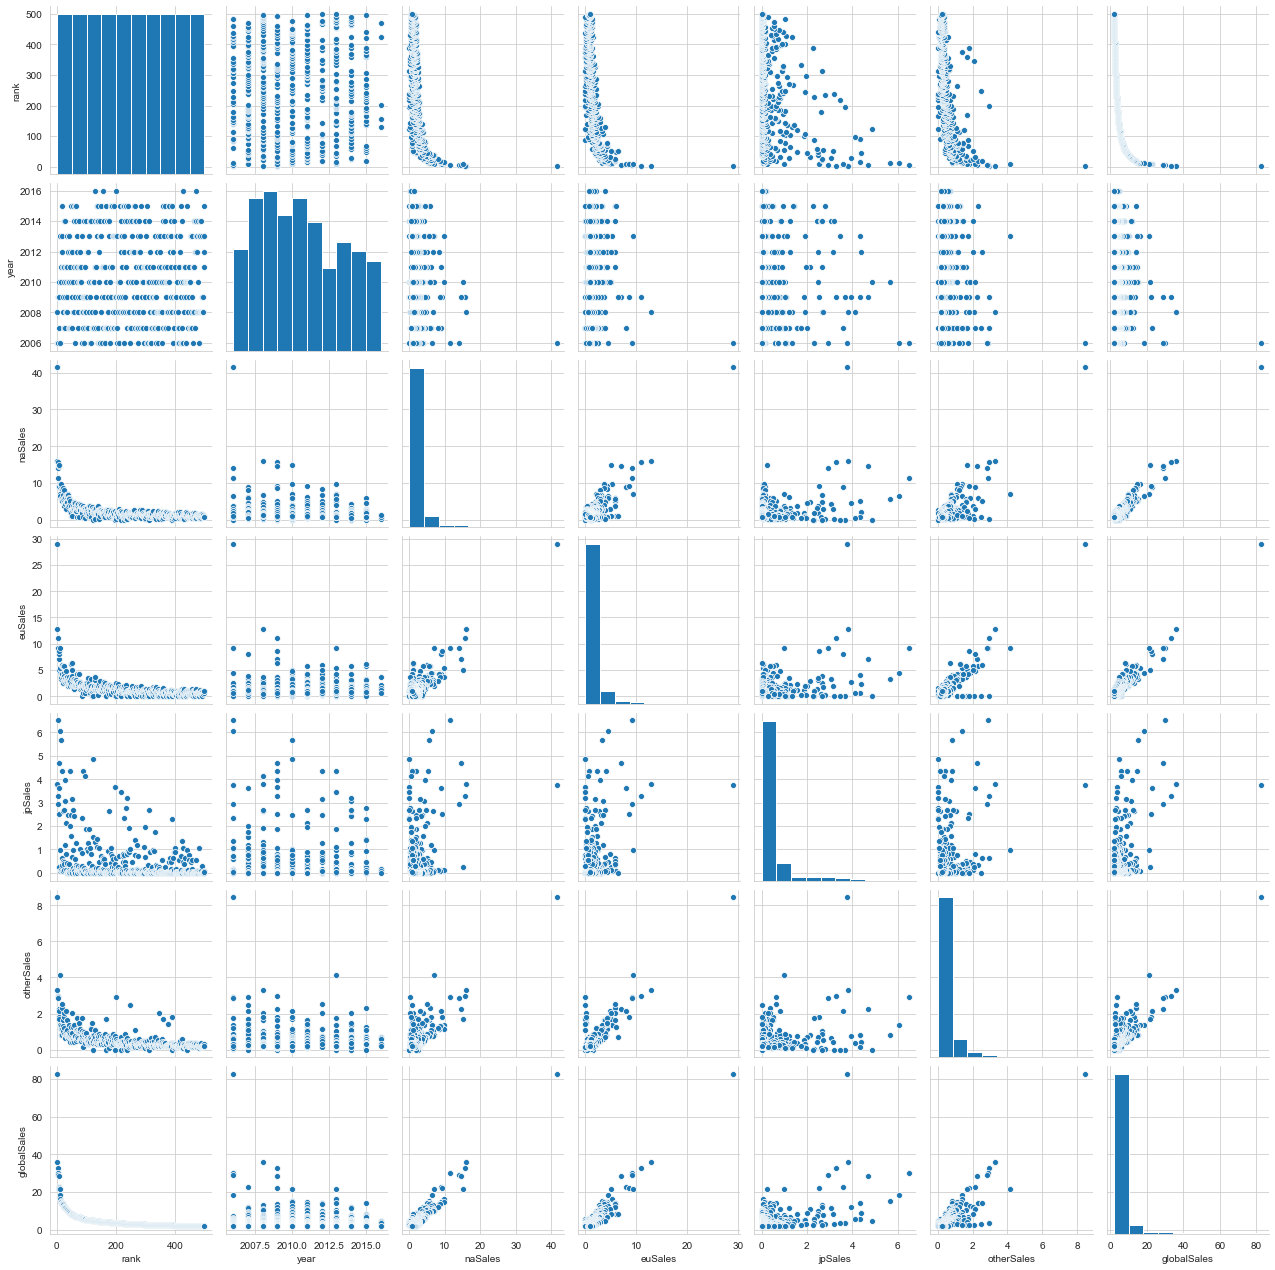

In [15]:
#create pairplot of vgsales
sb.pairplot(top500since2006)

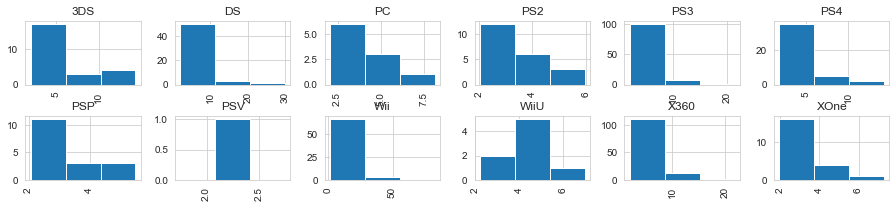

In [16]:
# create histogram of global sales, based on platform
globalSalesHist = top500since2006.hist(column = 'globalSales', by = 'platform', bins = 3, layout = (6, 6))

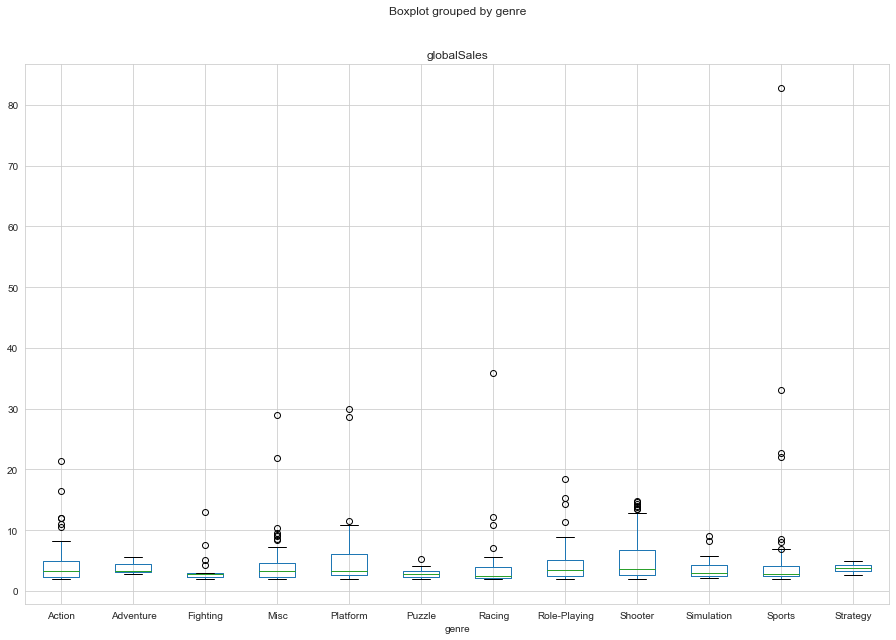

In [17]:
top500since2006.boxplot(column='globalSales', by = "genre")

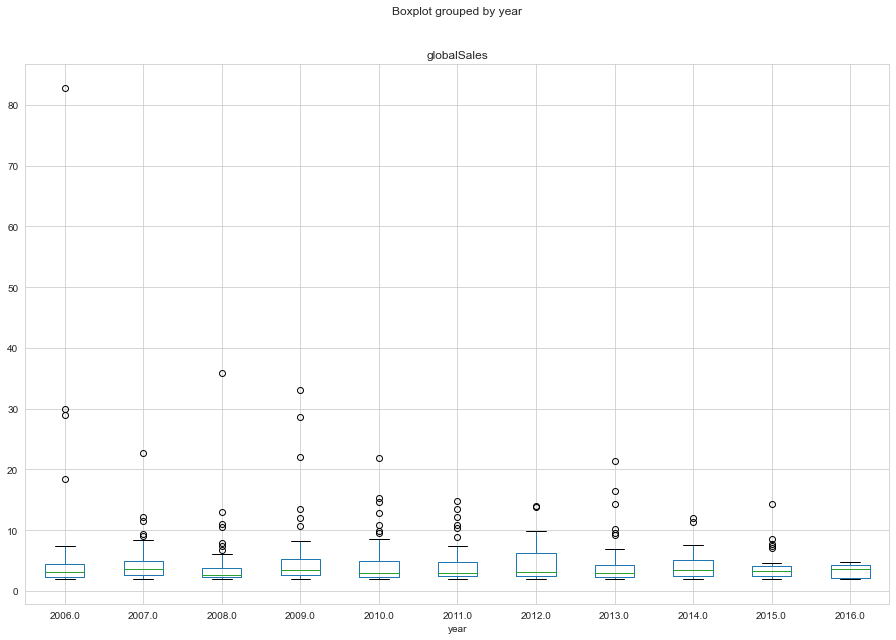

In [18]:
top500since2006.boxplot(column='globalSales', by = "year")

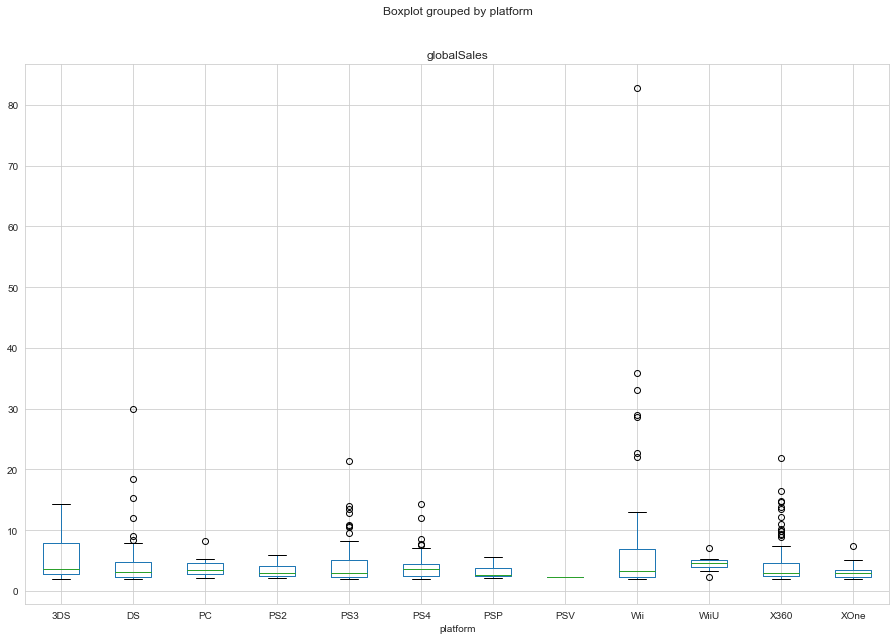

In [19]:
top500since2006.boxplot(column='globalSales', by = "platform")

[Text(0, 0, '505 Games'),
 Text(0, 0, 'Activision'),
 Text(0, 0, 'Atari'),
 Text(0, 0, 'Bethesda Softworks'),
 Text(0, 0, 'Capcom'),
 Text(0, 0, 'Deep Silver'),
 Text(0, 0, 'Disney Interactive Studios'),
 Text(0, 0, 'Eidos Interactive'),
 Text(0, 0, 'Electronic Arts'),
 Text(0, 0, 'Konami Digital Entertainment'),
 Text(0, 0, 'Level 5'),
 Text(0, 0, 'LucasArts'),
 Text(0, 0, 'MTV Games'),
 Text(0, 0, 'Majesco Entertainment'),
 Text(0, 0, 'Microsoft Game Studios'),
 Text(0, 0, 'Midway Games'),
 Text(0, 0, 'Mindscape'),
 Text(0, 0, 'NCSoft'),
 Text(0, 0, 'Namco Bandai Games'),
 Text(0, 0, 'Nintendo'),
 Text(0, 0, 'RedOctane'),
 Text(0, 0, 'Sega'),
 Text(0, 0, 'Sony Computer Entertainment'),
 Text(0, 0, 'Sony Computer Entertainment Europe'),
 Text(0, 0, 'Square Enix'),
 Text(0, 0, 'THQ'),
 Text(0, 0, 'Take-Two Interactive'),
 Text(0, 0, 'Ubisoft'),
 Text(0, 0, 'Valve Software'),
 Text(0, 0, 'Warner Bros. Interactive Entertainment')]

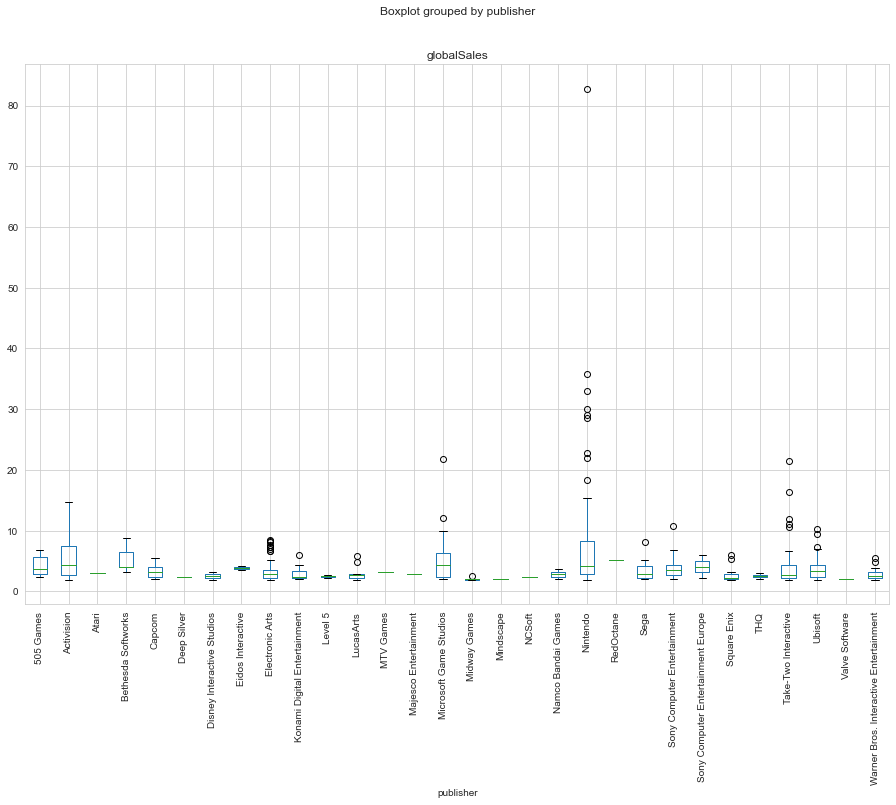

In [20]:
fig = top500since2006.boxplot(column='globalSales', by = "publisher")
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)

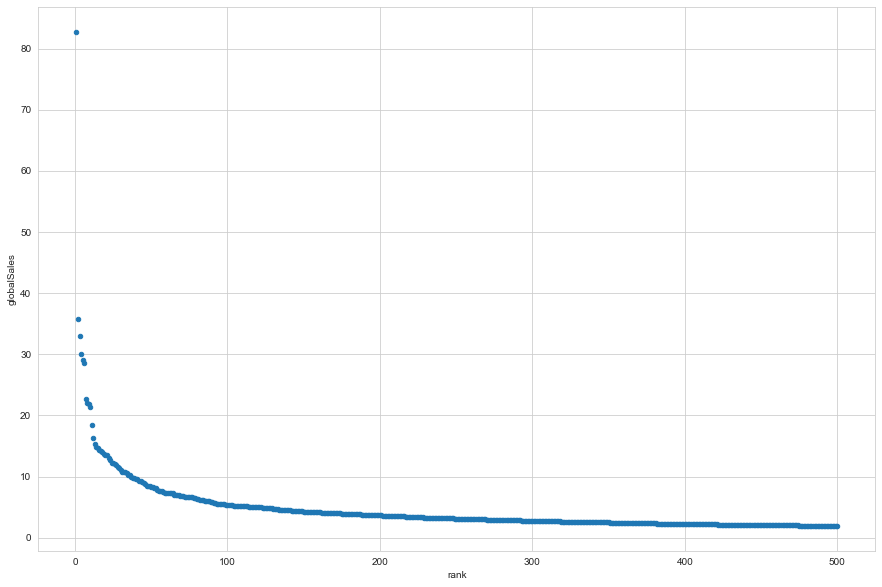

In [21]:
top500since2006.plot(kind = "scatter", x = 'rank', y = 'globalSales')
#sb.regplot(x = 'rank', y = 'globalSales', data = top500since2006, scatter = True)

Text(0, 0.5, 'Total Global Sales')

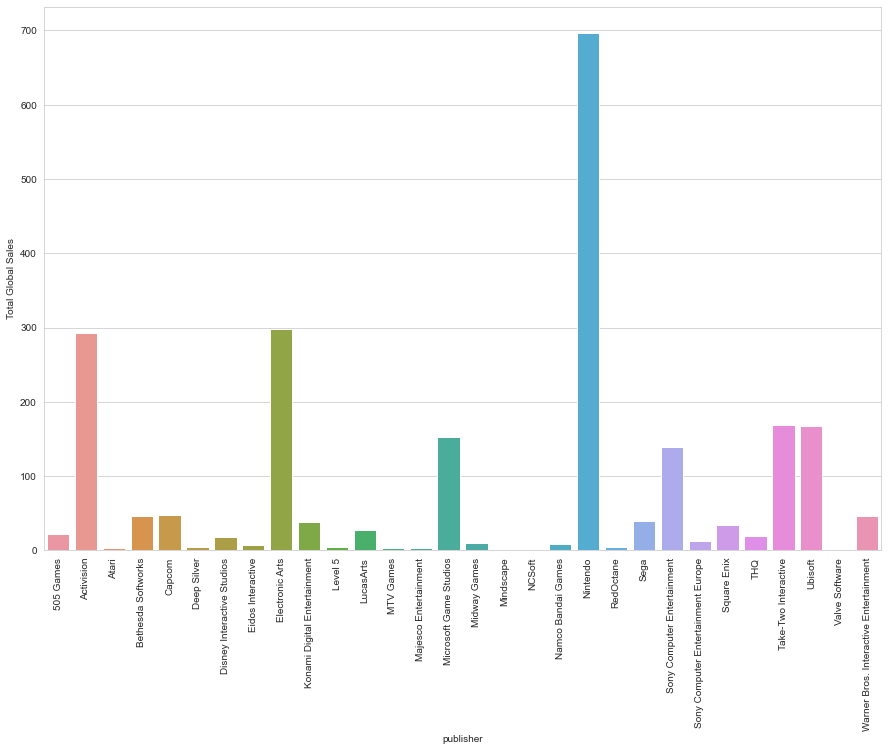

In [39]:
df_grp = top500since2006.groupby(['publisher', 'platform', 'genre'])['globalSales'].sum().reset_index()

ax = sb.barplot(x='publisher', y='globalSales', data=df_grp, ci=None, estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Total Global Sales')


Text(0, 0.5, 'Mean Global Sales')

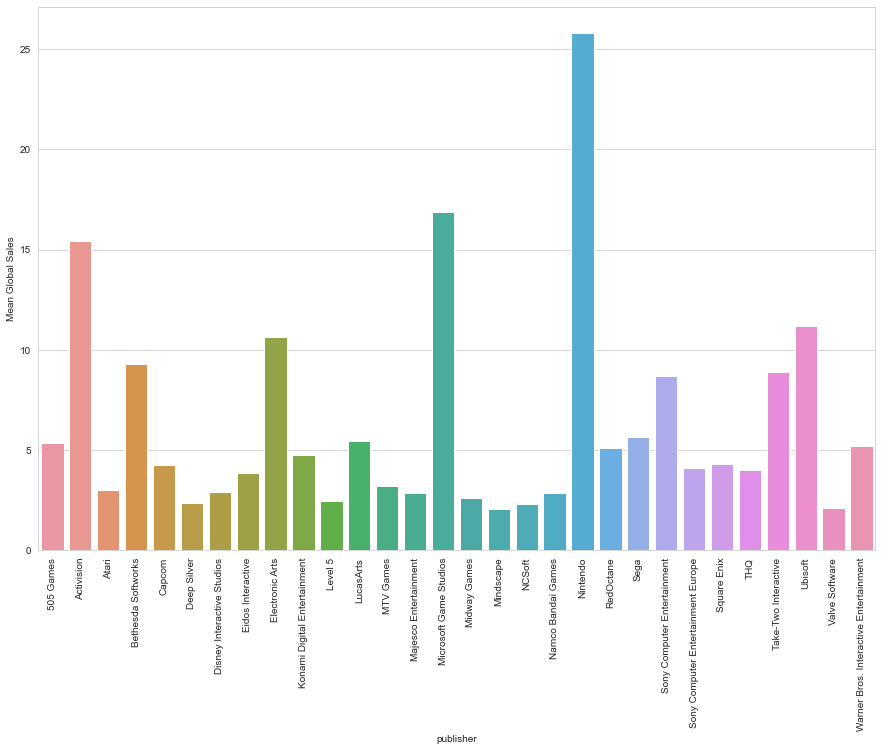

In [40]:
ax = sb.barplot(x='publisher', y='globalSales', data=df_grp, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Mean Global Sales')

Text(0, 0.5, 'Total Global Sales')

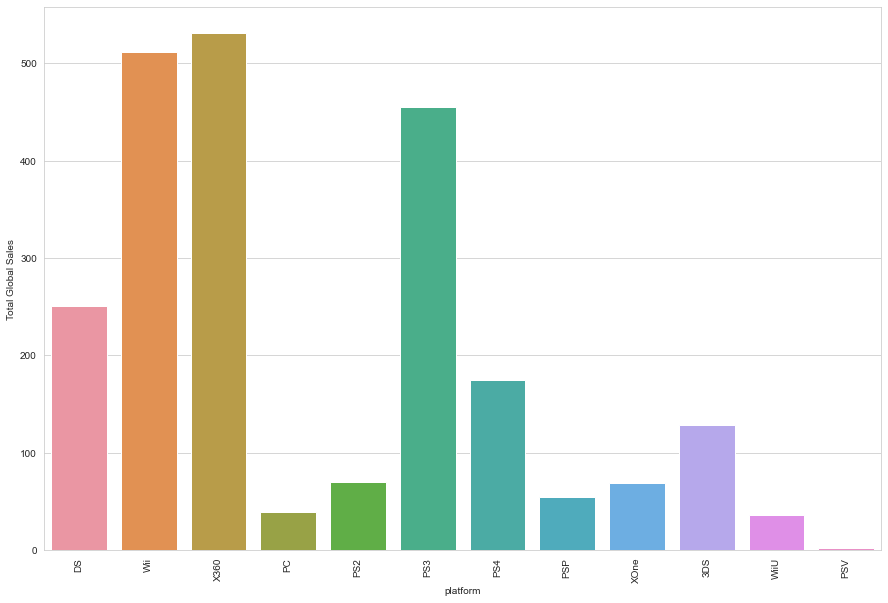

In [41]:
ax = sb.barplot(x='platform', y='globalSales', data=df_grp, ci=None, estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Total Global Sales')

Text(0, 0.5, 'Mean Global Sales')

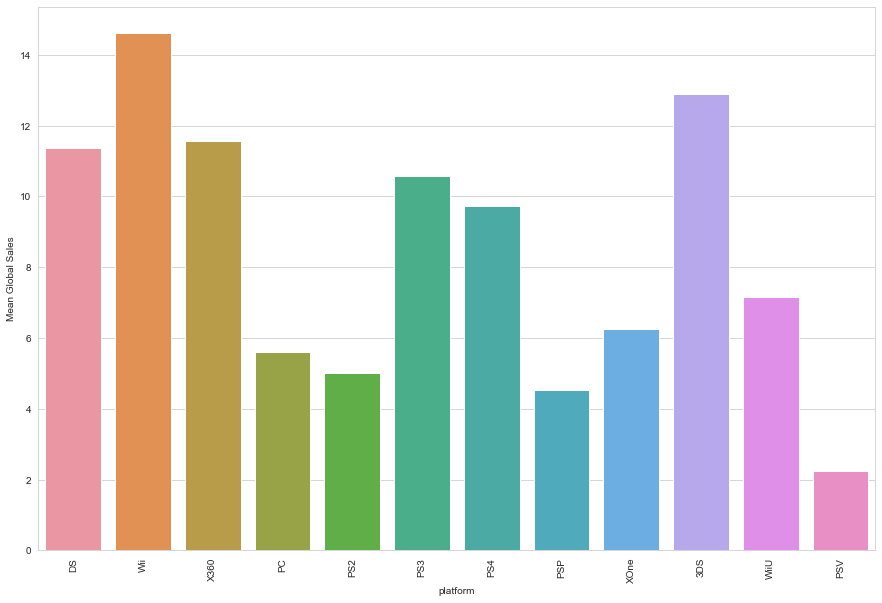

In [43]:
ax = sb.barplot(x='platform', y='globalSales', data=df_grp, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Mean Global Sales')

Text(0, 0.5, 'Total Global Sales')

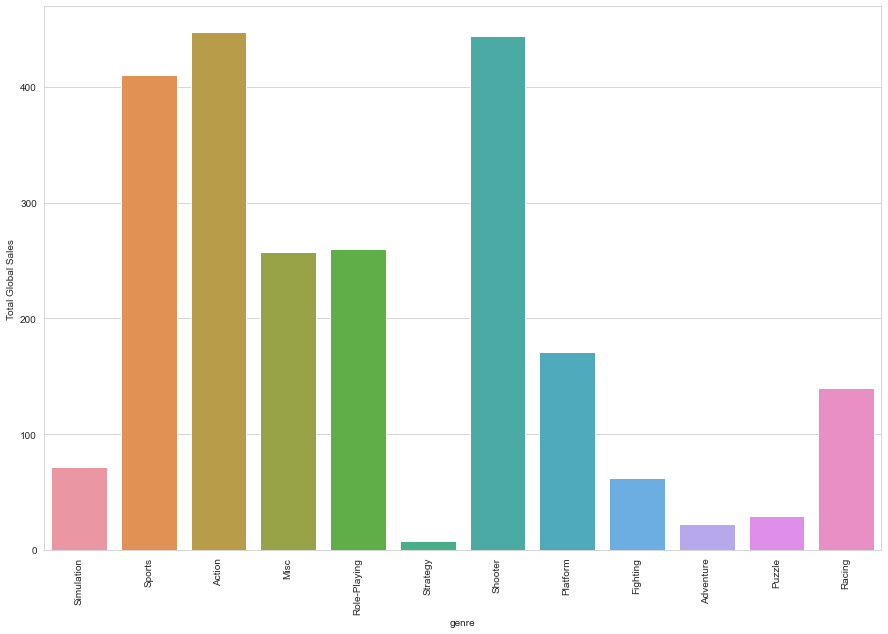

In [42]:
ax = sb.barplot(x='genre', y='globalSales', data=df_grp, ci=None, estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Total Global Sales')

Text(0, 0.5, 'Mean Global Sales')

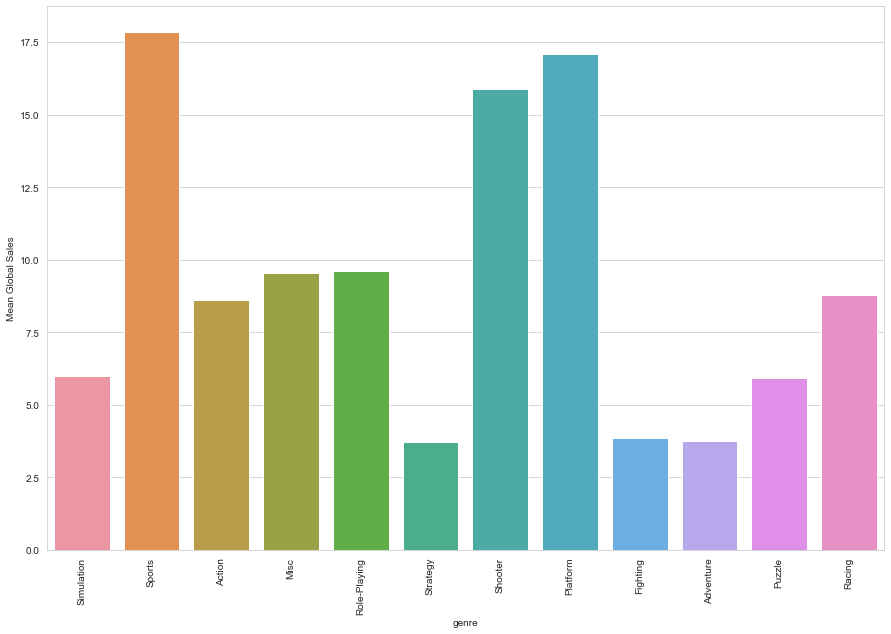

In [44]:
ax = sb.barplot(x='genre', y='globalSales', data=df_grp, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Mean Global Sales')